# 04 그래프 그리기

## 04-1 데이터 시각화가 필요한 이유

In [3]:
# 앤스콤 데이터 집합 불러오기
    # 앤스콤 데이터 집합은 seaborn 라이브러리에 포함되어있음
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
    # load_dataset 메서드에 문자열 anscombe 전달 -> 앤스콤 데이터 집합 불러옴
print(anscombe)
print(type(anscombe))

# dataset 열이 데이터 그룹을 구분한다는 것을 알 수 있다.

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [4]:
# matplotlib 라이브러리 불러오기
%matplotlib notebook
import matplotlib.pyplot as plt

In [5]:
# anscombe 데이터프레임의 dataset 열에서 데이터 값이 I인것만 추출(즉, 첫번째 데이터 그룹 추출)
dataset_1 = anscombe[anscombe['dataset'] =='I']

<IPython.core.display.Javascript object>


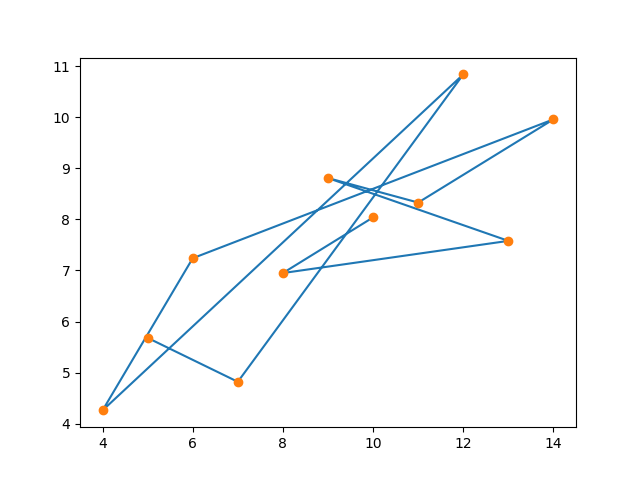

In [6]:
# plot메서드에 dataset_1의 x,y열 전달
plt.plot(dataset_1['x'], dataset_1['y'])

In [7]:
# 점으로 그래프 그려보기 : 'o'를 세번째 인자로 전달한다.
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

In [8]:
# 앤스콤 데이터 집합 모두 사용해 그래프 만들기 (한번에 4개 그래프 그리기)
    # 데이터 불린 추출(1은 위에 이미 저장했음)
dataset_2 = anscombe[anscombe['dataset'] =='II']
dataset_3 = anscombe[anscombe['dataset'] =='III']
dataset_4 = anscombe[anscombe['dataset'] =='IV']

<IPython.core.display.Javascript object>


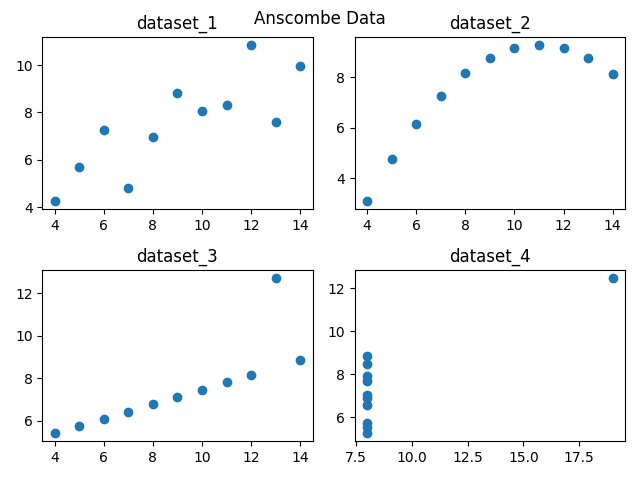

In [9]:
# 그래프 격자가 위치할 기본 틀 만들기
fig = plt.figure()

In [10]:
# 그래프 격자 그리기 : add_subplot 메서드
    # 첫번째 인자는 그래프 기본틀의 행 크기, 두번째 인자에는 그래프 기본틀의 열 크기 지정
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

<IPython.core.display.Javascript object>


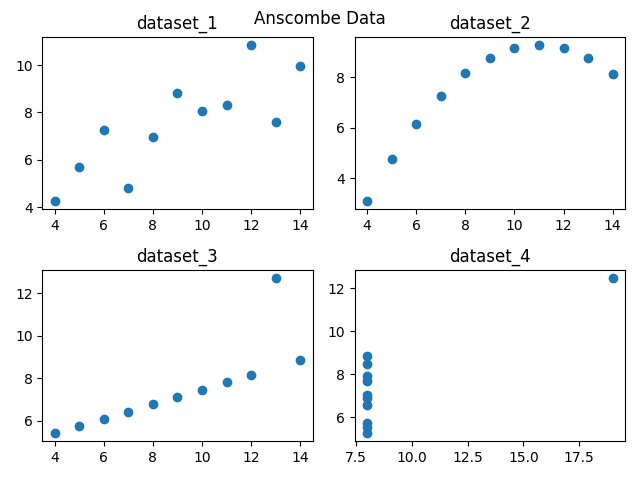

In [11]:
# plot 메서드에 데이터 전달하여 그래프 그리기
    # 그래프 확인하려면 'fig' 반.드.시 입력 !
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

<IPython.core.display.Javascript object>


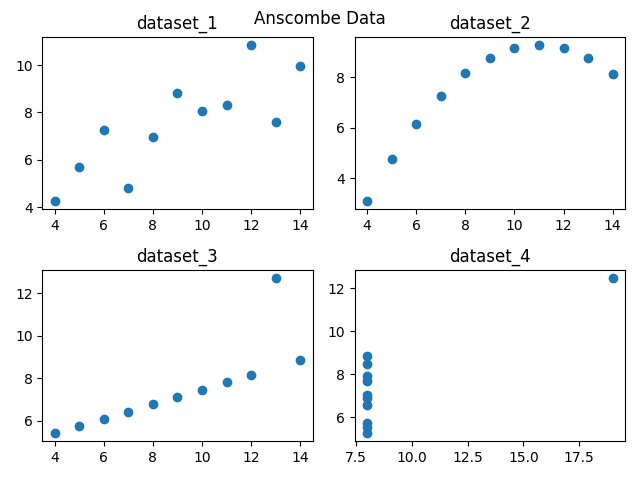

In [12]:
# 그래프 격자에 제목 추가하기 : set_title 메서드
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig

<IPython.core.display.Javascript object>


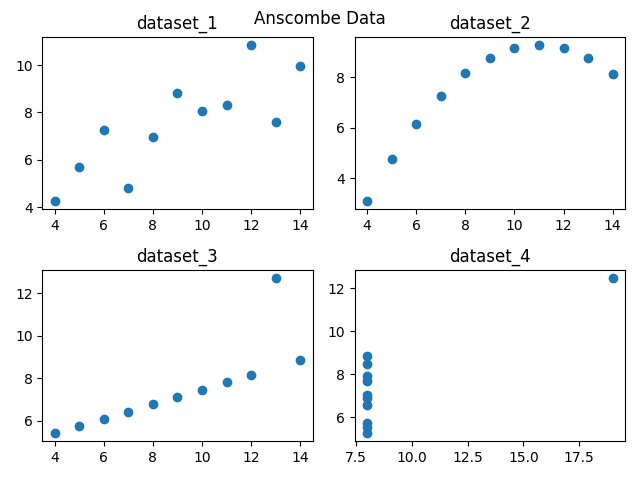

In [13]:
# 기본틀(fig)에 제목 추가 : suptitle 메서드
fig.suptitle("Anscombe Data")

fig

<IPython.core.display.Javascript object>


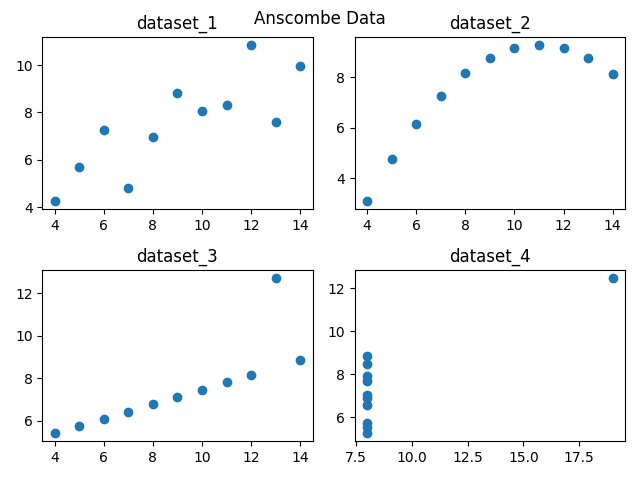

In [14]:
# 각 그래프의 레이아웃 조절 : tight_layout 메서드
fig.tight_layout()

fig

## 04-2 matplotlib 라이브러리 자유자재로 사용하기

In [15]:
# 기초 그래프 그리기 - 히스토그램, 산점도 그래프, 박스 그래프
    # 데이터 집합을 불러와 변수 tips에 저장하기
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>


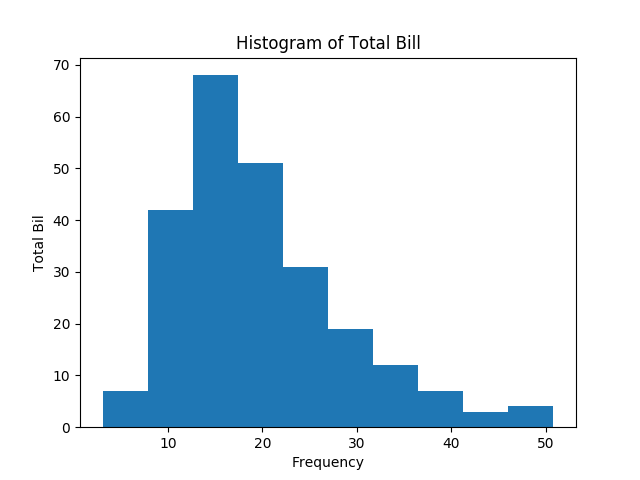

In [16]:
# 기본틀 마련, 그래프 격자 구성
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)

<IPython.core.display.Javascript object>


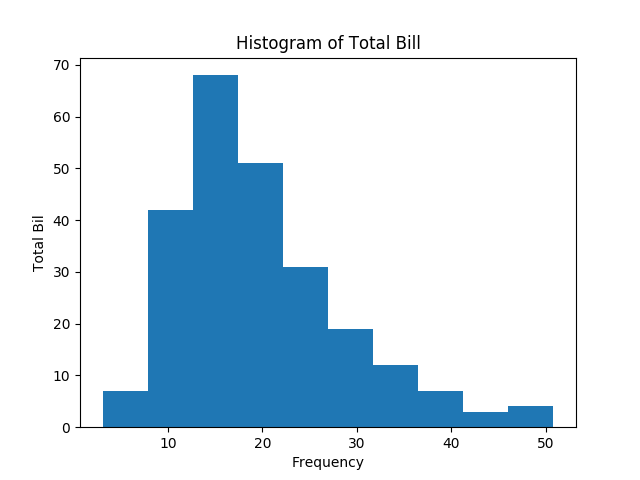

In [17]:
# 히스토그램 그리기(빈도 알아보기 / 변수 하나만 ! = 일변량 그래프)
    # bins 인잣값으로 x축 간격 조정
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency') # x축 제목 추가
axes1.set_ylabel('Total Bil') # y축 제목 추가

fig

<IPython.core.display.Javascript object>


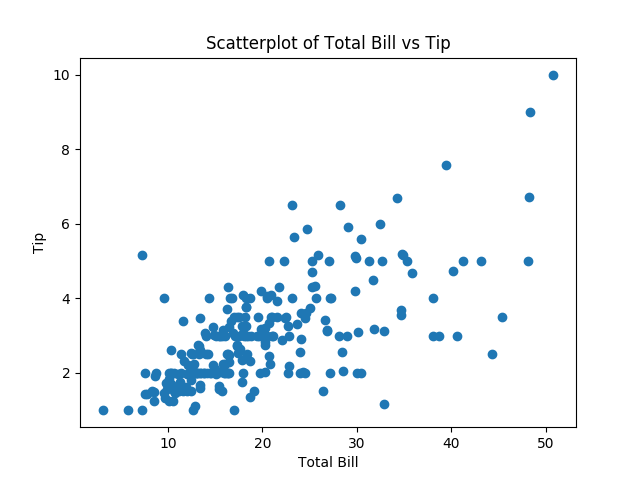

Text(0, 0.5, 'Tip')

In [18]:
# 산점도 그래프 그리기(변수 2개 사용 = 이변량 그래프)
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip']) #변수 2개
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

<IPython.core.display.Javascript object>


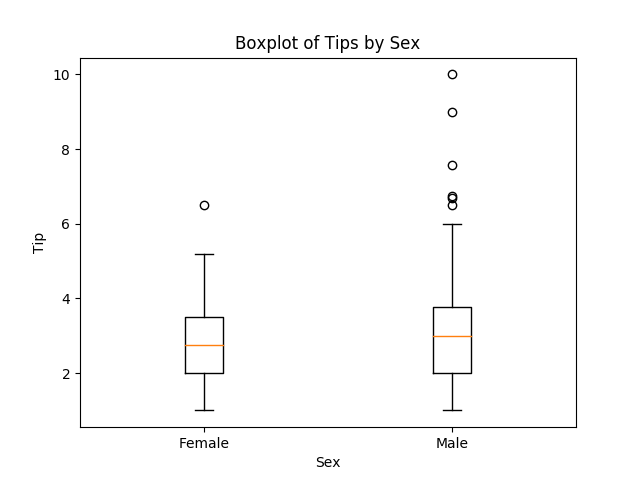

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

In [19]:
# 박스 그래프 그리기(이산형 변수, 연속형 변수 함께 사용)
    # 이산형 변수 : 명확하게 구분되는 값
    # 연속형 변수 : 명확하게 셀 수 없는 범위의 값
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)

    # Female, Male 각 데이터에서 tip 열 데이터만 추출하여 리스트에 전달
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
              tips[tips['sex'] == 'Male']['tip']],
             labels = ['Female', 'Male']) # 이름 추가

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

In [20]:
# 다변량 데이터로 다변량 그래프 그리기(3개이상의 변수 사용) - 산점도 그래프
    # Female, Male과 같은 문자열은 색상을 지정하는 값 사용 X
    # 따라서 각 문자열을 정수로 치환하는 함수를 만들어야 함
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else :
        return 1

In [21]:
    # 반환한 값을 데이터 프레임에 추가하기
        # recode_sex 함수가 반환한 값(0,1)을 sex_color 열을 새로 생성하여 추가한 것
    tips['sex_color'] = tips['sex'].apply(recode_sex)
        
        # sex열에 recode_sex 함수를 브로드캐스팅하기 위해 appply 메서드 사용

<IPython.core.display.Javascript object>


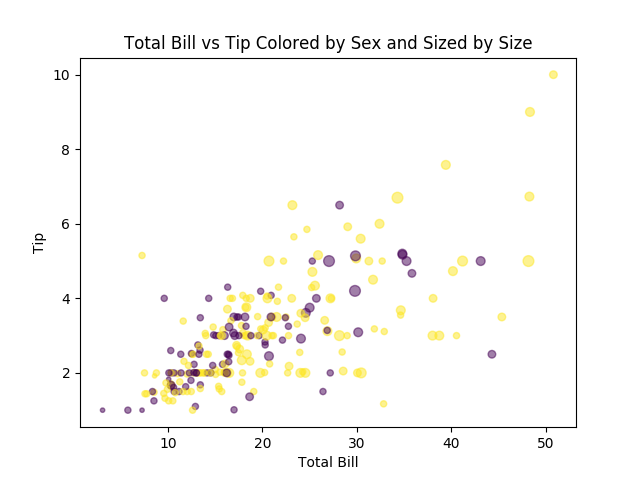

Text(0, 0.5, 'Tip')

In [22]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10,
    c = tips['sex_color'],
    alpha = 0.5)
    # size 열도 추가한 것. 
    # s(점의크기),c(점의 색상) 인잣값으로 테이블당 인원수와 성별의 치환값 전달

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## 04-3 seaborn 라이브러리 자유자재로 사용하기

In [23]:
# 단변량 그래프 그리기 - 히스토그램
import seaborn as sns

tips = sns.load_dataset("tips")

<IPython.core.display.Javascript object>


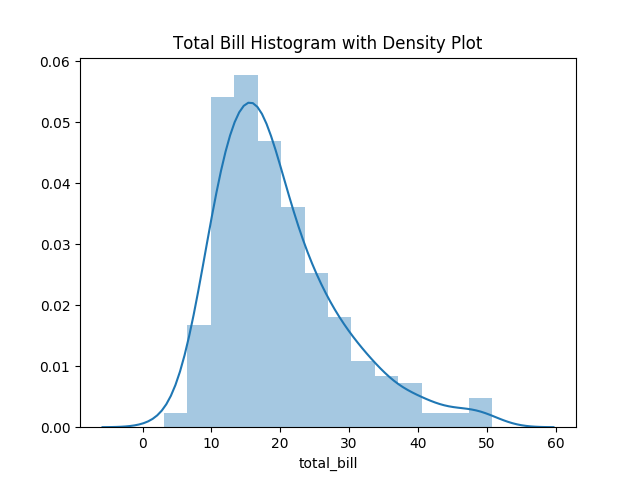

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

In [24]:
# subplots, displot 메서드 사용하기
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

<IPython.core.display.Javascript object>


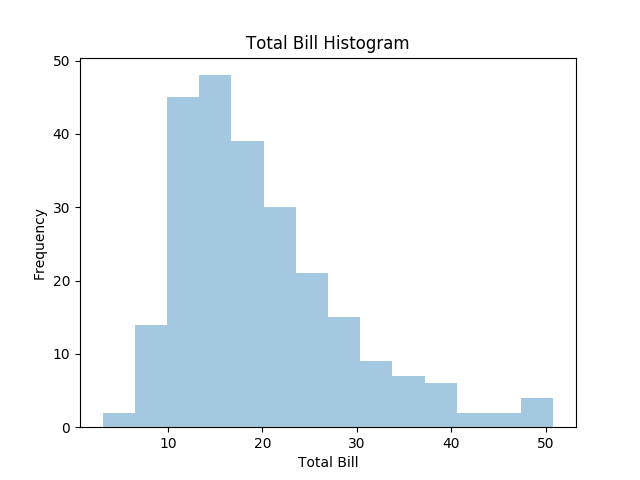

Text(0, 0.5, 'Frequency')

In [25]:
# 히스토그램과 밀집도 그래프 같이 그리기 : distplot 메서드
    # 밀집도 그래프 제외하고 싶다면 kde 인잣값 Flase로 설정하면 된다
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

<IPython.core.display.Javascript object>


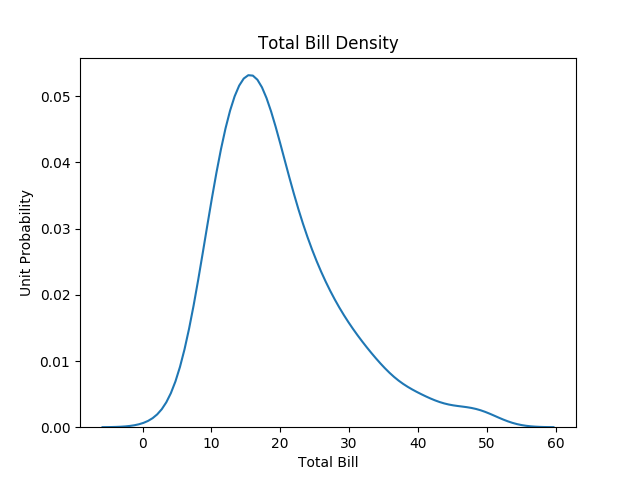

Text(0, 0.5, 'Unit Probability')

In [27]:
# 밀집도 그래프만 나타내려면 hist인자 False로
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

<IPython.core.display.Javascript object>


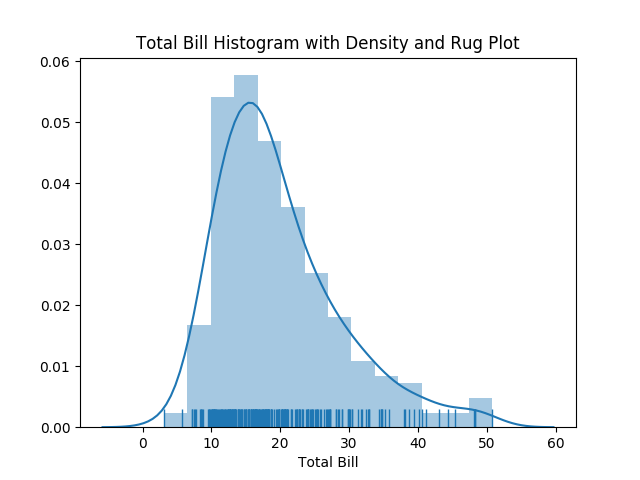

Text(0.5, 0, 'Total Bill')

In [28]:
# 양탄자 그래프 그리기
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

<IPython.core.display.Javascript object>


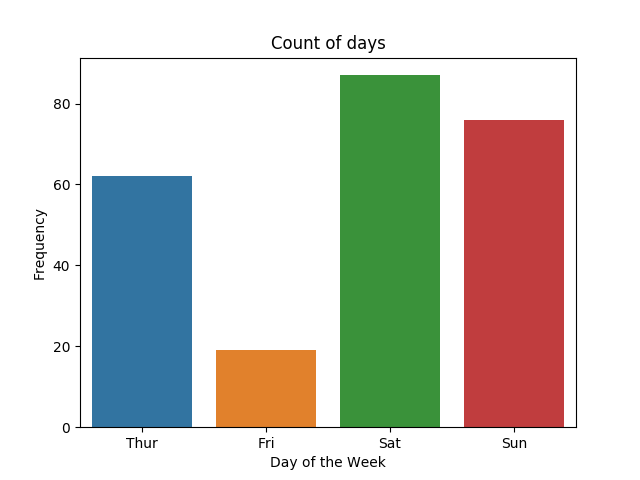

Text(0, 0.5, 'Frequency')

In [29]:
# count 그래프 그리기
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

<IPython.core.display.Javascript object>


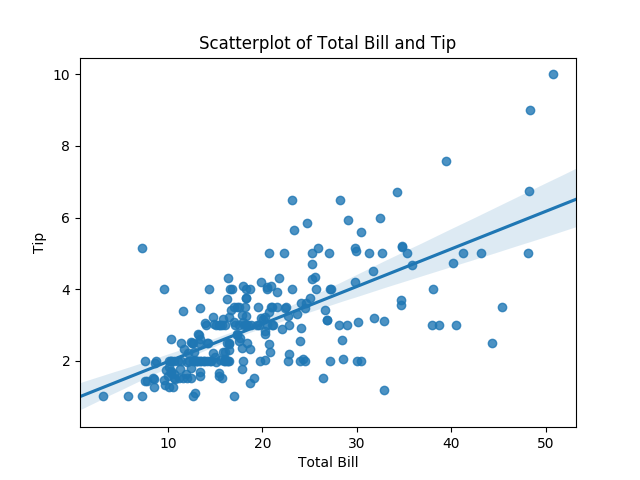

Text(0, 0.5, 'Tip')

In [30]:
# seaborn 라이브러리로 산점도 그래프 그리기

ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips) 
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

<IPython.core.display.Javascript object>


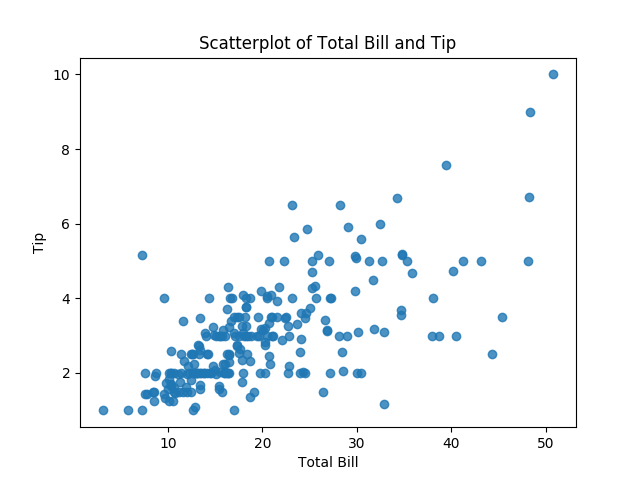

Text(0, 0.5, 'Tip')

In [31]:
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False) 
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

<IPython.core.display.Javascript object>


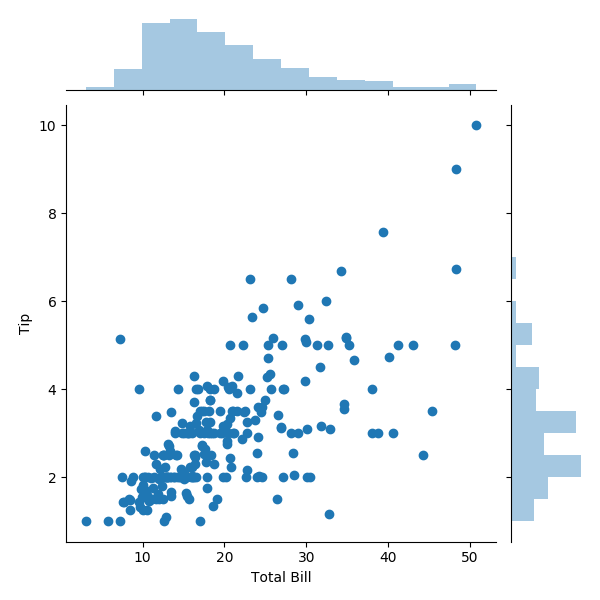

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

In [32]:
# 산점도 그래프와 히스토그램을 한 번에 그려주기 : jointplot 메서드
joint = sns.jointplot(x='total_bill', y='tip', data=tips) 
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

<IPython.core.display.Javascript object>


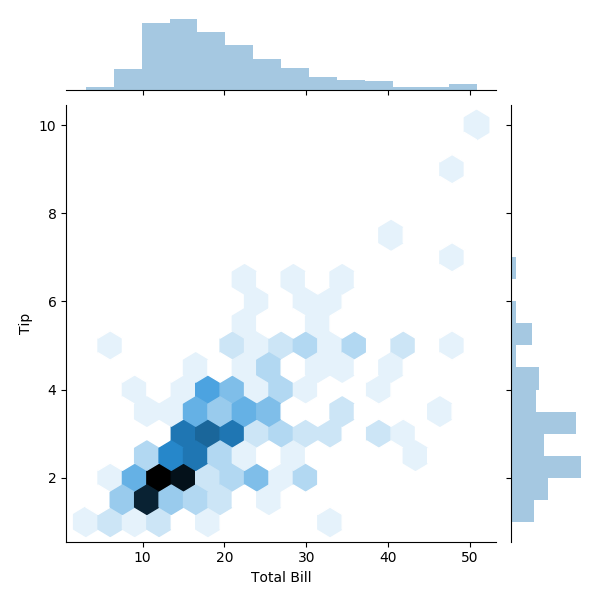

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

In [33]:
# 육각 그래프 : 산점도 그래프의 데이ㅓ를 구분하기 쉽게 그리고 싶다면 !
    # 2차원 표면에 육각형으로 데이터를 쌓아 표현하는 그래프
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex") 
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

<IPython.core.display.Javascript object>


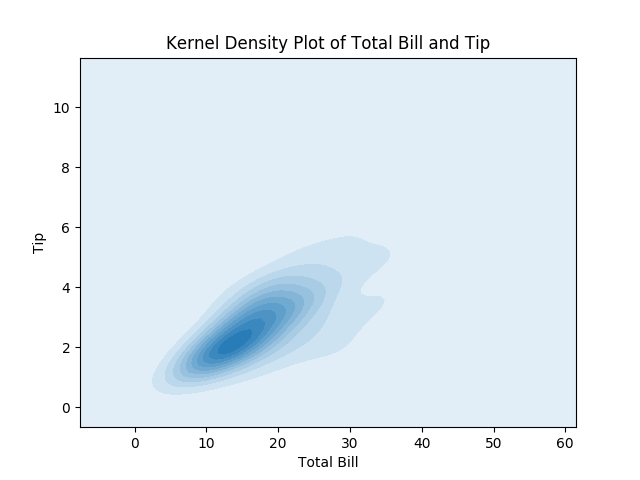

Text(0, 0.5, 'Tip')

In [34]:
# 이차원 밀집도 그리기 : kdeplot 메서드
kde, ax = plt.subplots() 
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'], 
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

<IPython.core.display.Javascript object>


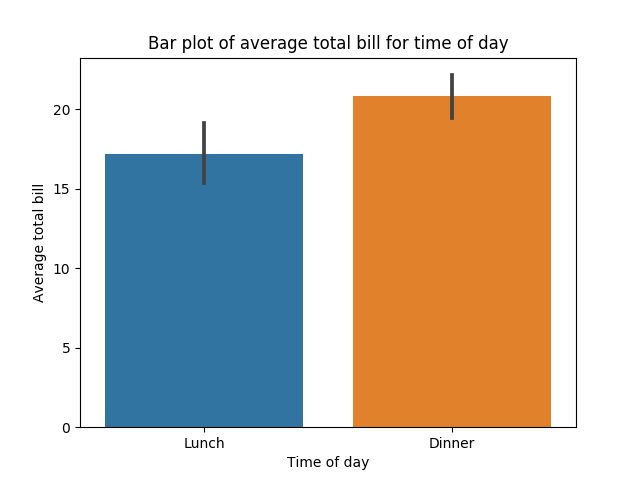

Text(0, 0.5, 'Average total bill')

In [35]:
# 바 그래프 그리기 : 지정한 변수의 평균을 계산하여 그릴 수 있다
ax = plt.subplots() 
ax = sns.barplot(x='time', y='total_bill', data=tips) 
ax.set_title('Bar plot of average total bill for time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Average total bill')

<IPython.core.display.Javascript object>


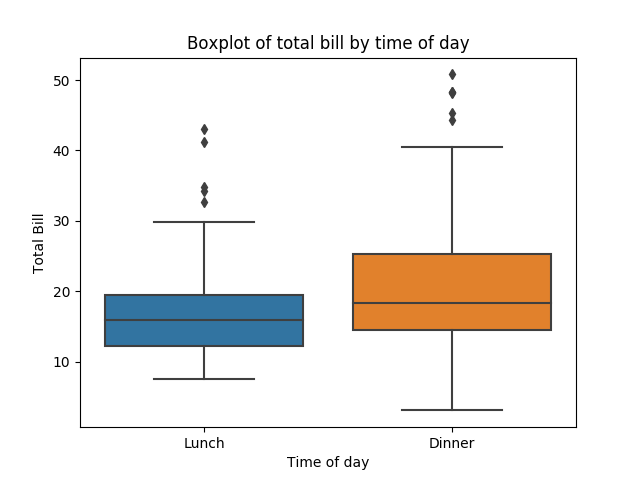

Text(0, 0.5, 'Total Bill')

In [36]:
# 박스 그래프 그리기 
    # : 최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치 등 다양한 통계량 한 번에 표현하는 그래프
ax = plt.subplots() 
ax = sns.boxplot(x='time', y='total_bill', data=tips) 
ax.set_title('Boxplot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill') 

<IPython.core.display.Javascript object>


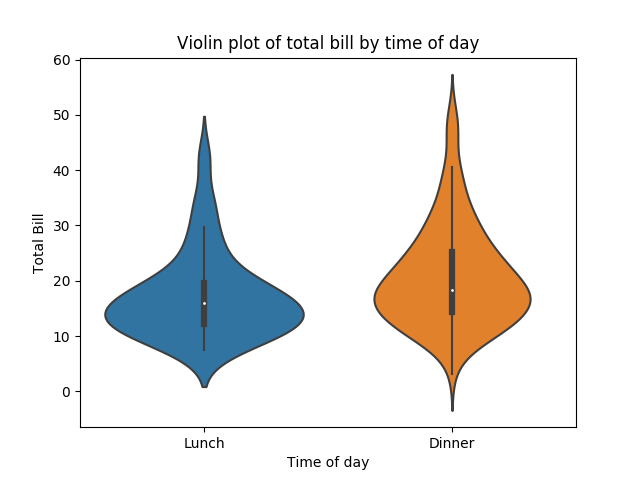

Text(0, 0.5, 'Total Bill')

In [37]:
# 바이올린 그래프 : 박스그래프의 데이터 분산이 모호하게 표현되는 것을 보완(?)
    # 박스그래프에 커널 밀도를 추정한 것
ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', data=tips) 
ax.set_title('Violin plot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')

<IPython.core.display.Javascript object>


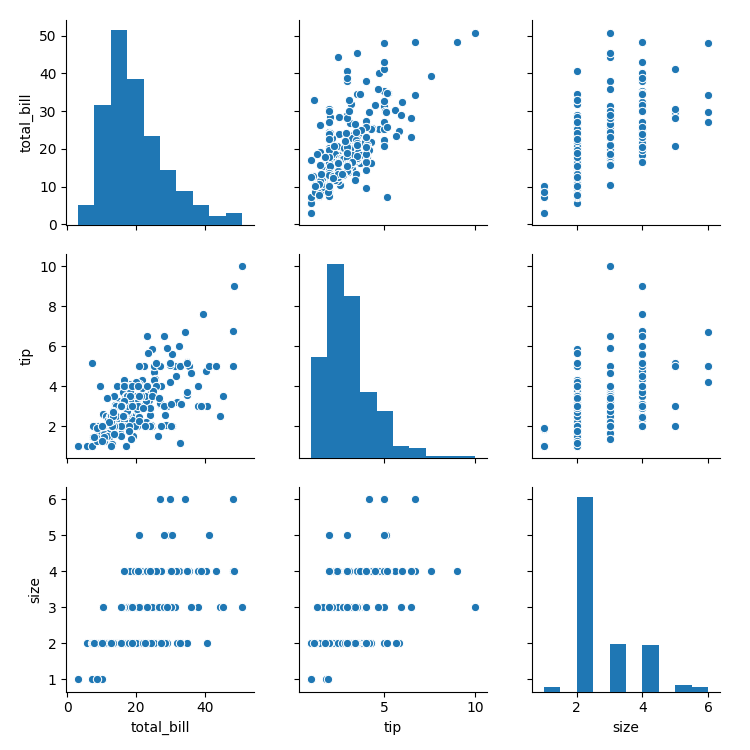

In [39]:
# 관계 그래프 그리기 : 종합한 그래프 : pairplot 메서드
fig = sns.pairplot(tips)

/Users/seuli/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


<IPython.core.display.Javascript object>


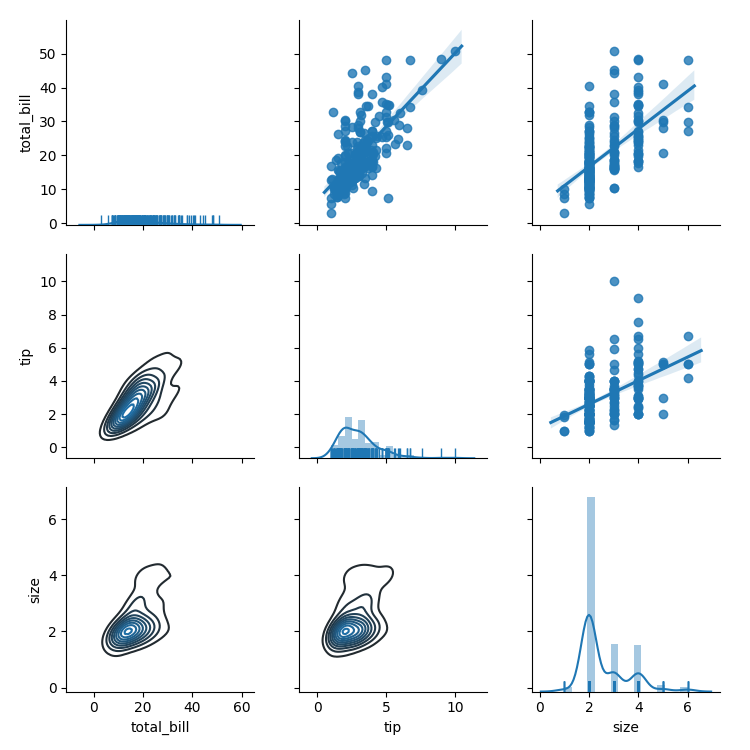

In [40]:
# 단점 : 중복된 정보가 표현된다. 관계 그래프의 절반은 나머지 절반과 같다(대각선 기준)
    # -> 중복된 그래프가 그려지는 위치를 직접 지정하여 원하는 그래프로 교체
        # map_upper 메서드 : 대각선을 기준으로 위쪽에 그릴 그래프 지정
        # map_lower 메서드 : 대각선을 기준으로 아래쪽에 그릴 그래프 지정
        # map_diag 메서드 : 대각선을 중심으로 그래프 그린다.
pair_grid = sns.PairGrid(tips) 
pair_grid = pair_grid.map_upper(sns.regplot) 
pair_grid = pair_grid.map_lower(sns.kdeplot) 
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) 
plt.show()

/Users/seuli/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


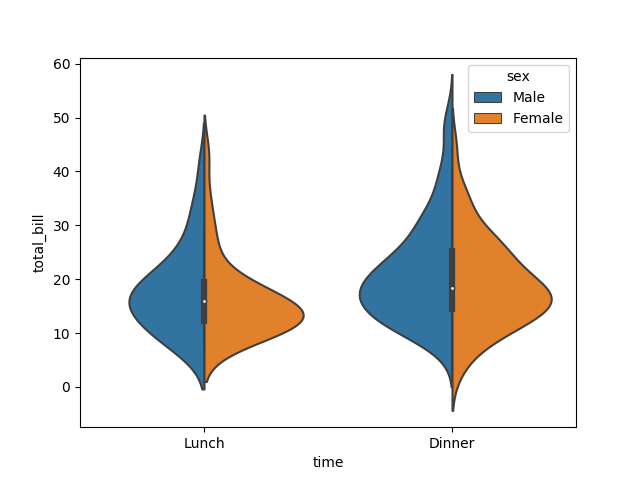

In [41]:
# 다변량 그래프 그리기
# seaborn 라이브러리로 바이올린 그래프 그리기 - 색상추가
    # violinplot 메서드에 hue 인잣값으로 색상!
violin, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 
plt.show()

/Users/seuli/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<IPython.core.display.Javascript object>


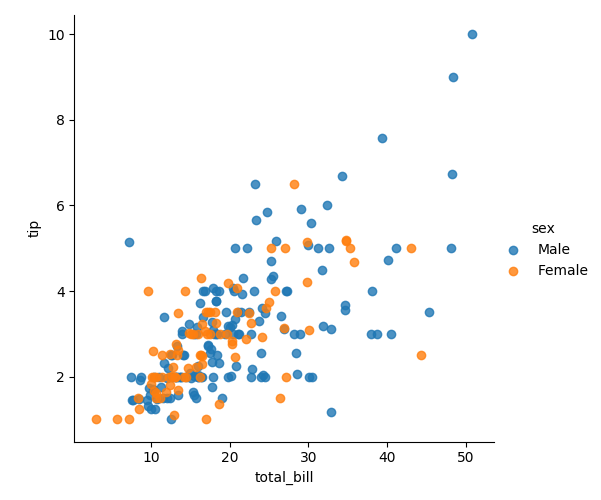

In [42]:
# 산점도, 관계 그래프 그리기 - 색상추가
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False) 
plt.show()

<IPython.core.display.Javascript object>


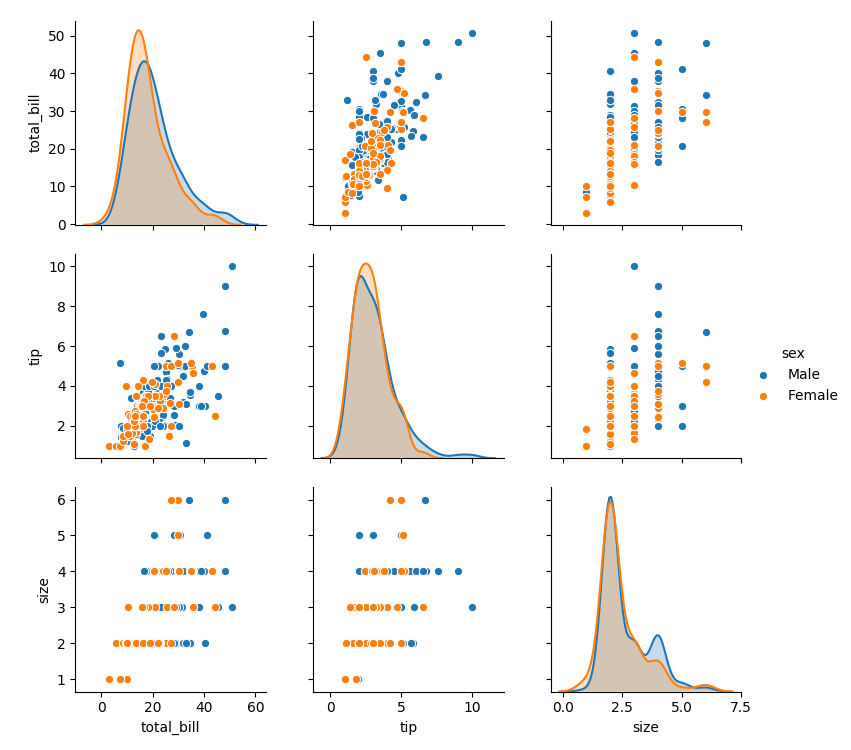

In [43]:
fig = sns.pairplot(tips, hue='sex')

<IPython.core.display.Javascript object>


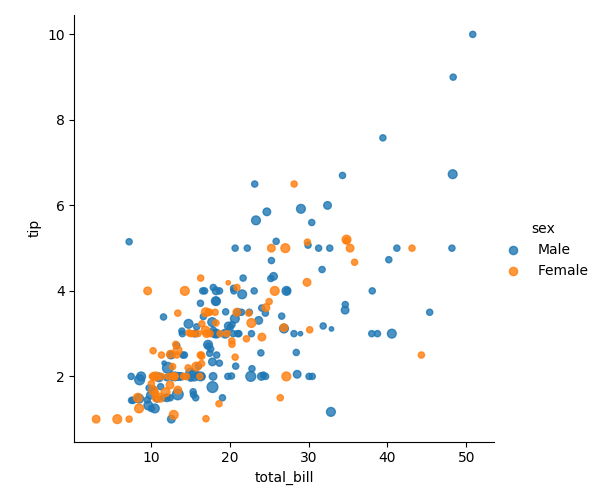

In [44]:
# 산점도 그래프의 크기와 모양 조절하기
    # (점 크기 조절하려면 scatter_kws에 딕셔너리 형태로 인잣값 전달)
    # 여기서는 크기만 조절
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', scatter_kws={'s': tips['size']*10}) 
plt.show()

<IPython.core.display.Javascript object>


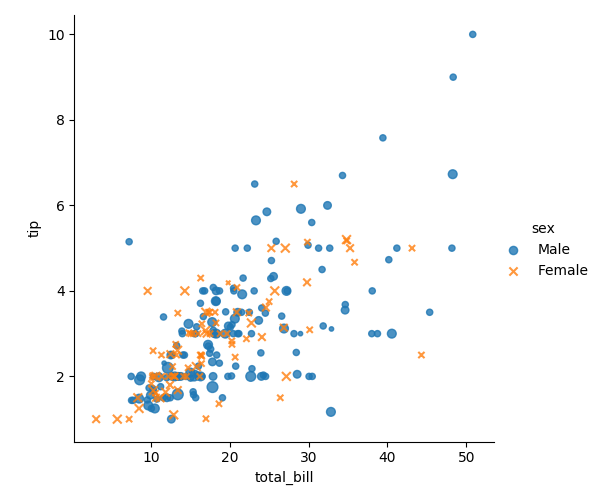

In [45]:
# 산점도 그래프의 점을 다른 기호로 표현하기 
    # markers 인잣값에 표현하고자 하는 기호 리스트 전달
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', markers=['o', 'x'], scatter_kws={'s': tips['size']*10}) 
plt.show()

<IPython.core.display.Javascript object>


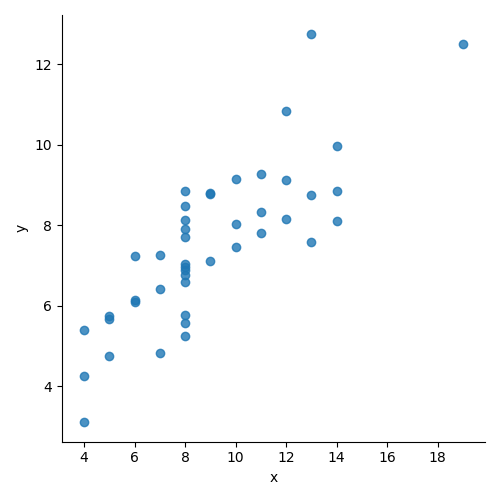

In [46]:
# implot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

/Users/seuli/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


<IPython.core.display.Javascript object>


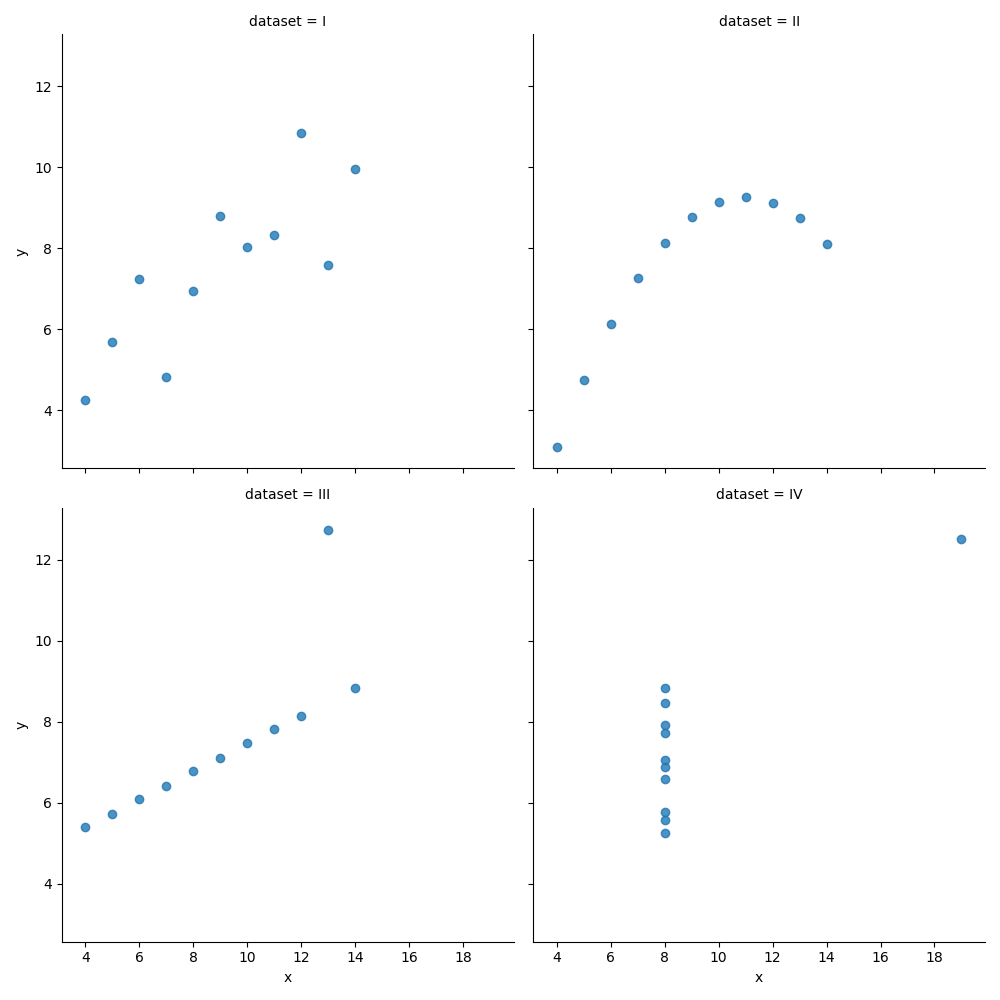

In [47]:
# 그룹별로 그래프 나누어 그리기 : implot 메서드에 col, col_wrap 인자 설저
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)

<IPython.core.display.Javascript object>


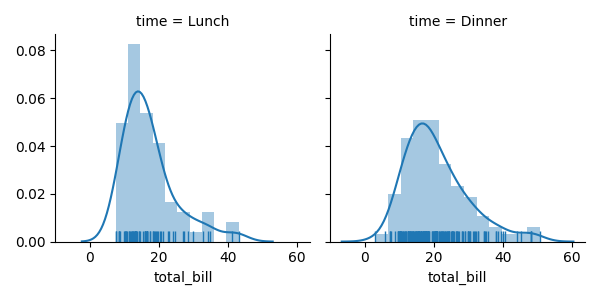

In [48]:
# FacetGrid 클래스를 사용하여 간편하게 그래프 그리기
    # 객체 생성
    # 객체의 map 메서드에 그래프 종류와 x축으로 지정할 열 이름 순서대로 전달
    # 히스토그램, 밀집도, 양탄자 그래프 그릴 수 있다.
facet = sns.FacetGrid(tips, col='time') 
facet.map(sns.distplot, 'total_bill', rug=True) 

<IPython.core.display.Javascript object>


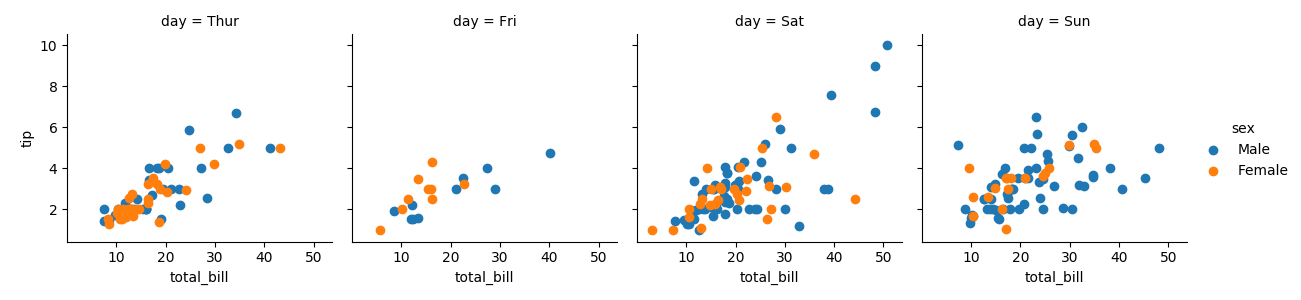

In [49]:
    # 다변량 그래프 그리기 
facet = sns.FacetGrid(tips, col='day', hue='sex') 
facet = facet.map(plt.scatter, 'total_bill', 'tip') 
facet = facet.add_legend()

<IPython.core.display.Javascript object>


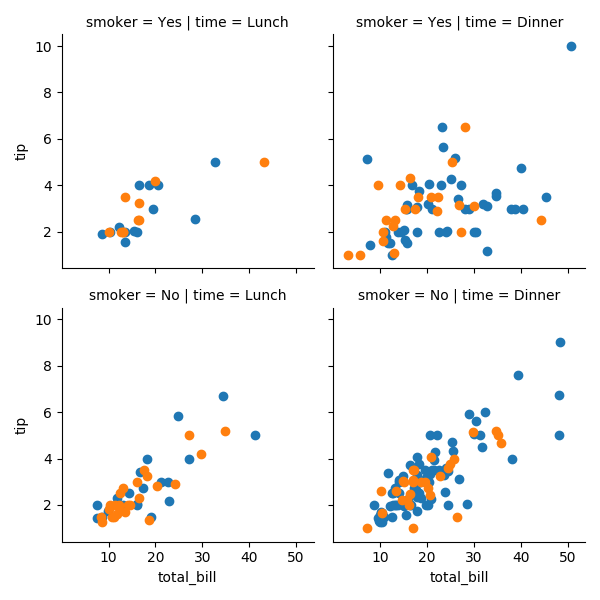

In [50]:
    # 더 많은 변수를 사용하여 그리기
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') 
facet.map(plt.scatter, 'total_bill', 'tip')

## 04-4 데이터프레임과 시리즈로 그래프 그리기

/Users/seuli/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


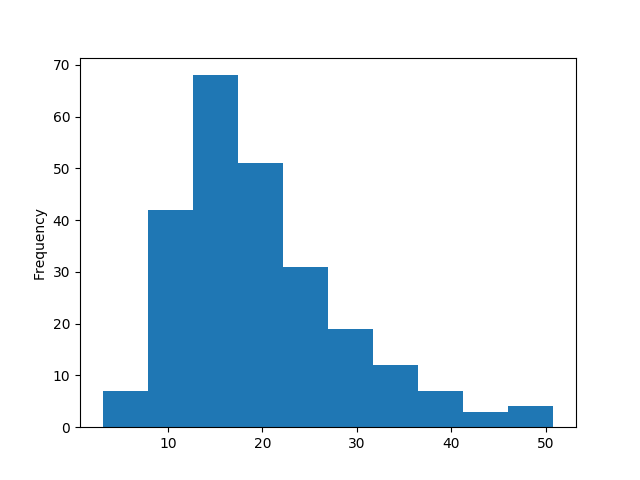

In [51]:
# hist 메서드로 히스토그램 그리기
fig, ax = plt.subplots()
ax = tips['total_bill'].plot.hist() 

/Users/seuli/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


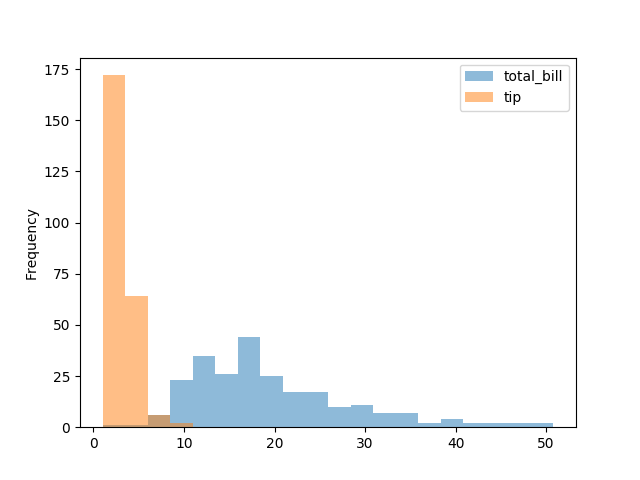

In [52]:
# hist 메서드의 alpha, bins, ax 인자 사용하여 투명도 조절
fig, ax = plt.subplots() 
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax) 

/Users/seuli/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


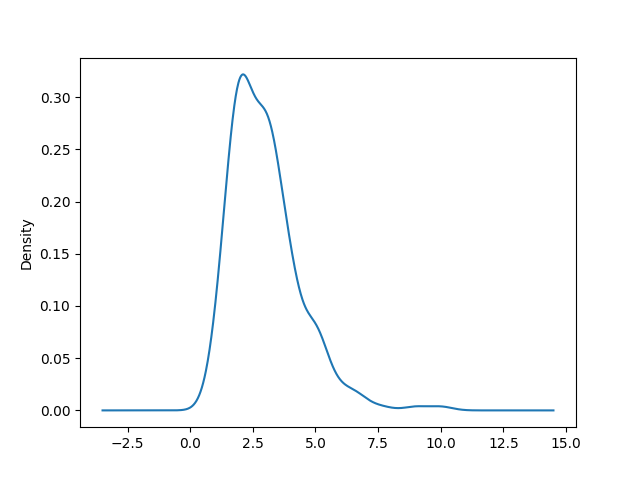

In [53]:
# 밀집도, 산점도, 육각 그래프는 각각 kde, scatter, hexbin 메서드를 사용하여 그린다
fig, ax = plt.subplots() 
ax = tips['tip'].plot.kde() 

/Users/seuli/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


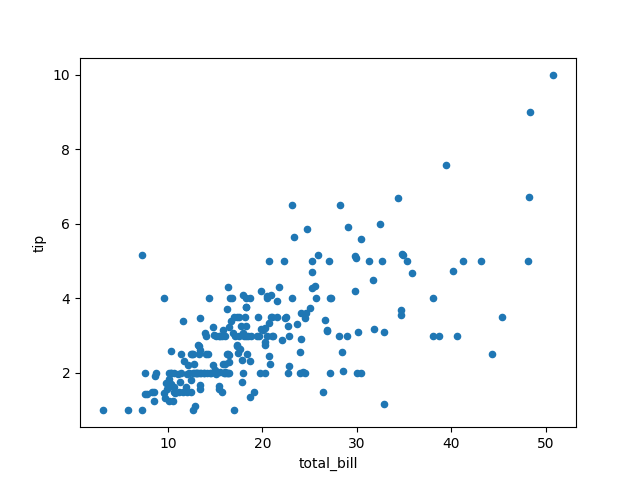

In [54]:
fig, ax = plt.subplots() 
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax) 

/Users/seuli/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


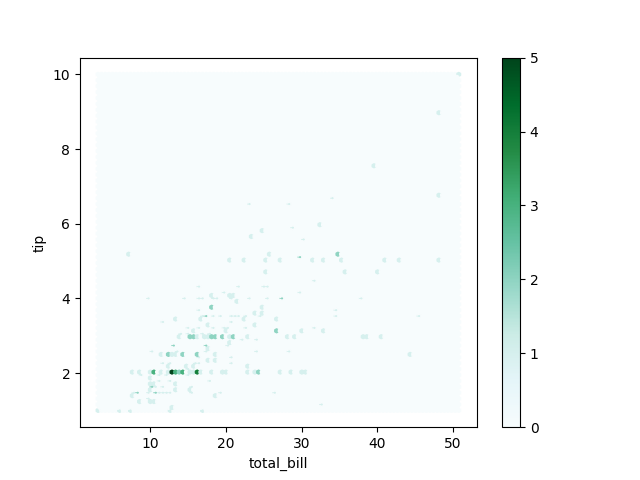

In [55]:
fig, ax = plt.subplots() 
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax) 

/Users/seuli/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


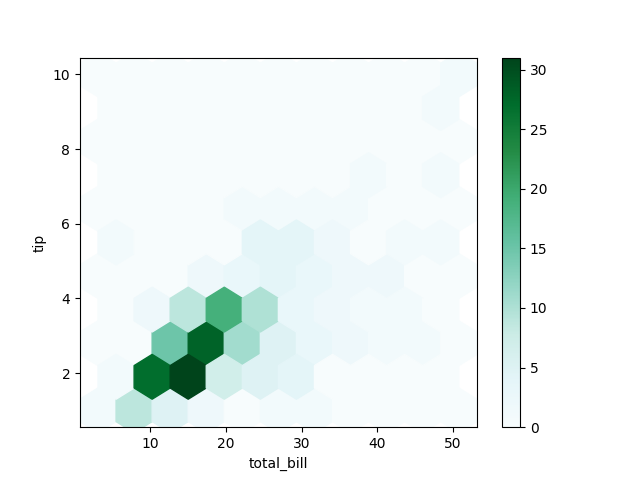

In [56]:
fig, ax = plt.subplots() 
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)

/Users/seuli/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


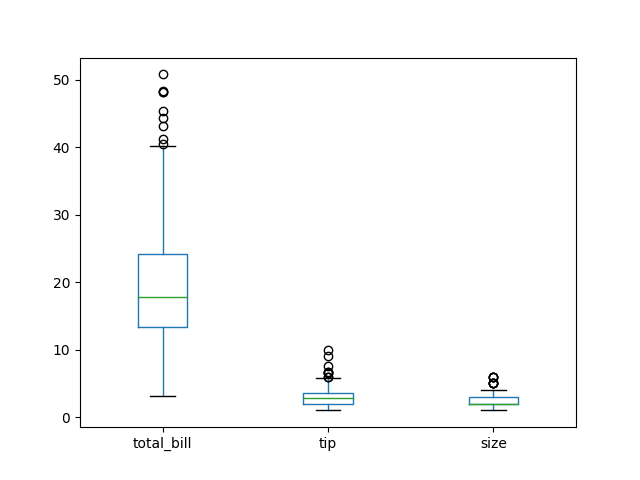

In [57]:
fig, ax = plt.subplots() 
ax = tips.plot.box(ax=ax) 

## 04-5 seaborn 라이브러리로 그래프 스타일 설정하기

/Users/seuli/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


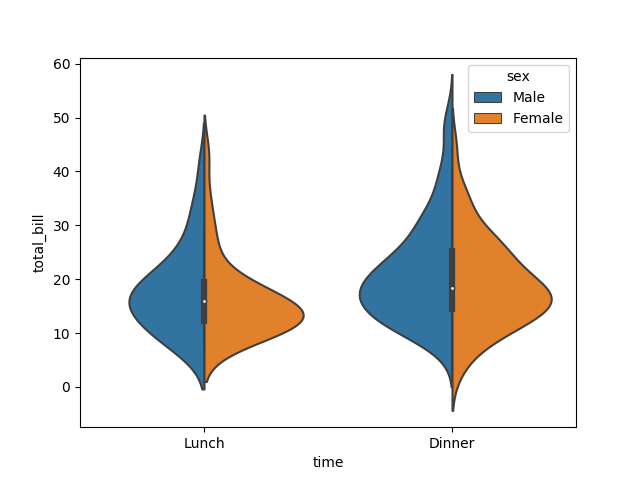

In [58]:
# 그래프에 스타일 적용하기
fig, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 

/Users/seuli/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


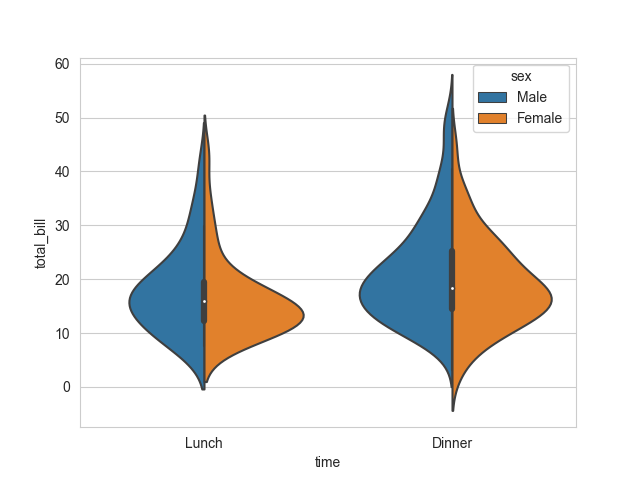

In [59]:
sns.set_style('whitegrid') 
    # whitegrid로 스타일 설정 -> 배경에 가로줄
fig, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 

/Users/seuli/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


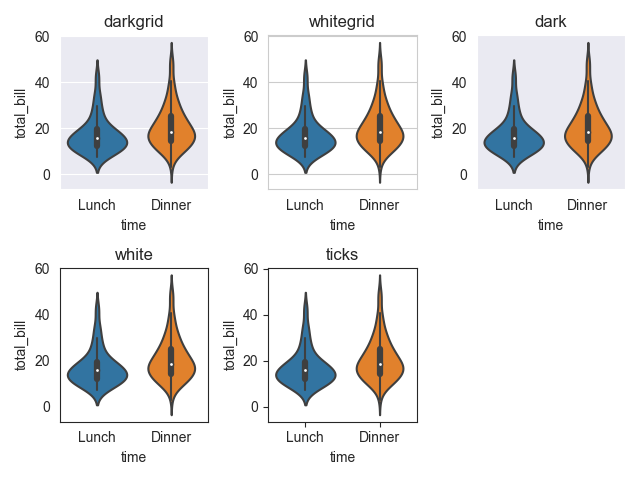

In [60]:
# for문을 이용하여 모든 스타일을 하나씩 적용하기
fig = plt.figure() 
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks'] 
for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style) 
        
fig.tight_layout() 